In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import time

plt.style.use("ggplot")

%matplotlib inline

In [7]:
G100 = nx.gnm_random_graph(100, 500, directed=True)

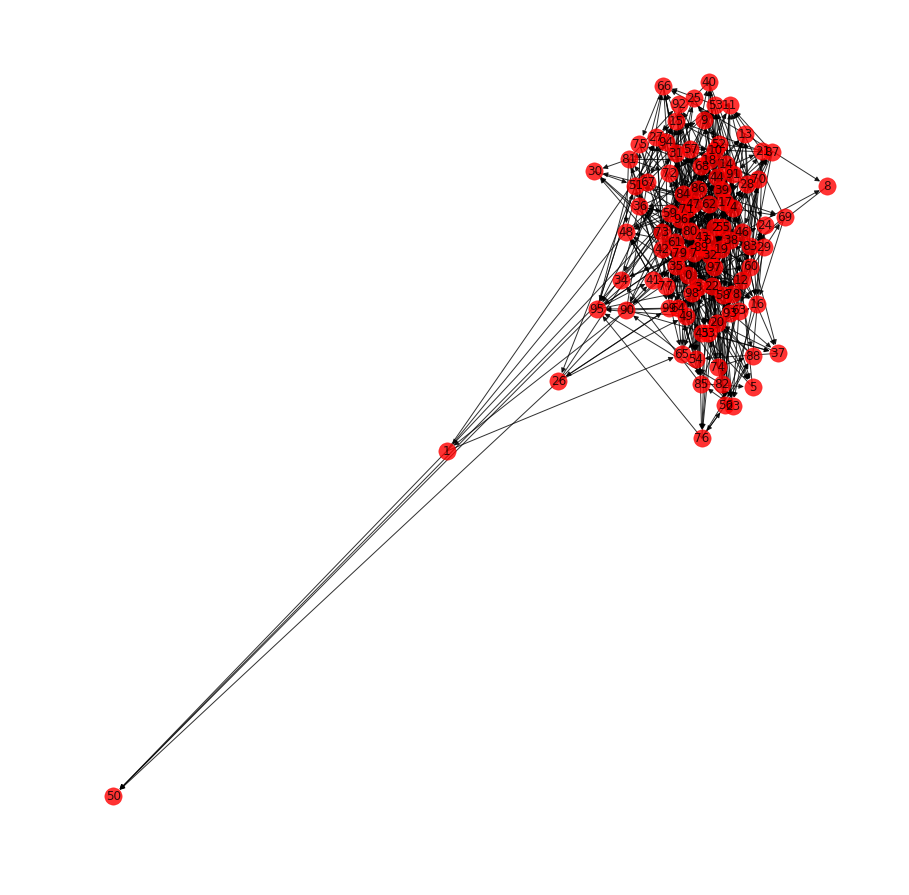

In [28]:
plt.figure(figsize=(12,12))

nx.draw(G100, 
        with_labels=True,
        alpha=0.8)
plt.show()

In [22]:
for (u,v,w) in G100.edges(data=True):
    w["weight"] = np.random.randint(1, 10)

In [23]:
G100.edges(data=True)

OutEdgeDataView([(0, 60, {'weight': 1}), (0, 29, {'weight': 3}), (0, 36, {'weight': 8}), (0, 2, {'weight': 8}), (0, 77, {'weight': 2}), (0, 33, {'weight': 8}), (1, 50, {'weight': 5}), (1, 15, {'weight': 4}), (1, 13, {'weight': 2}), (1, 65, {'weight': 3}), (2, 47, {'weight': 7}), (2, 7, {'weight': 6}), (2, 53, {'weight': 4}), (2, 79, {'weight': 8}), (2, 63, {'weight': 9}), (3, 49, {'weight': 4}), (3, 63, {'weight': 7}), (3, 76, {'weight': 9}), (3, 35, {'weight': 8}), (3, 68, {'weight': 8}), (3, 66, {'weight': 5}), (4, 65, {'weight': 1}), (4, 43, {'weight': 9}), (4, 70, {'weight': 8}), (4, 80, {'weight': 8}), (4, 18, {'weight': 8}), (4, 60, {'weight': 1}), (4, 2, {'weight': 5}), (5, 4, {'weight': 3}), (5, 45, {'weight': 8}), (6, 29, {'weight': 3}), (6, 36, {'weight': 4}), (6, 52, {'weight': 5}), (6, 56, {'weight': 1}), (7, 39, {'weight': 9}), (7, 14, {'weight': 6}), (7, 5, {'weight': 1}), (7, 57, {'weight': 9}), (7, 54, {'weight': 8}), (7, 0, {'weight': 9}), (7, 41, {'weight': 9}), (8, 8

In [25]:
G100.is_directed()

True

In [27]:
nx.is_weighted(G100)

True